# Random data generator, sequential estimator, baysian linear regression using numpy

# 1. Random Data Generator 

* Univariate gaussian data generator
    1. Input : Expectation value or mean: m and Variance: s
    2. Output: A data point from N(m,s)
* Polynomial basis linear model data generator
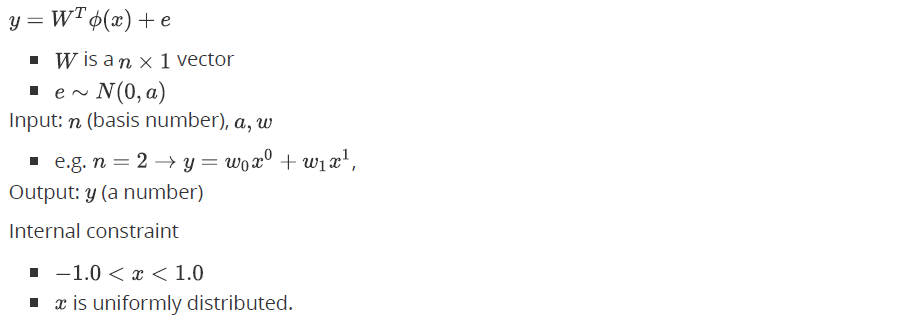


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log, sqrt, exp, pi, factorial, erf
from collections import OrderedDict
import random
import math

# a. Univariate gaussian data generator

In [2]:
def Gaussian_df(x,u, v):
    return (exp(-1*(((x - u)**2) / (2*v) ) ) / sqrt(2*pi*v))

def gaussian_pdf_line(mu, sig):
    X = []
    Y = []
    for i in range(-1000, 1000):
        x = i / 1000 * 4 * sig
        #x=i
        y = Gaussian_df(x, mu, sig)
        X.append(x)
        Y.append(y)
        
    return X, Y

def central_limit(mean=0,var=1,n=30000):
    N = list()
    for i in range(n):
        z = np.random.uniform(0,1,12)
        nz = np.sum(z)-6
        N.append(mean+var*nz)
    
    return N

In [3]:
def univariate_Data_Generator():
    N=list()
    N=central_limit(0,1)
    plt.figure(figsize=(10,6))    
    #plt.style.use('fivethirtyeight')    
    X,Y=gaussian_pdf_line(0,1)
    #_=plt.hist(N, bins=30, normed=True)
    #_=plt.plot(X,Y)
    #_=plt.title('Normal data using Central Limit Theorem ')
    
    return N

In [4]:
random_data = univariate_Data_Generator()

# b. Polynomial basis linear model data generator  

In [5]:
#version.1
def polynomial_data_generator1(N,W,x,n,a,plot=True):
    
    e=central_limit(0,a,N)
    d = {}
    for i in range(n):                
        d['x' + str(i)] = x ** (i)        
    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values())
    y_real = W.dot(X.T)
    y = W.dot(X.T)+np.random.normal(0, a)
    if plot:
        plt.figure(figsize=(10,6))    
        plt.style.use('fivethirtyeight')
        _=plt.plot(x,y, alpha=0.2)
        #_=plt.scatter(x,y_real)
        _=plt.title('Polynomial basis linear model data generator')
    
    return y

In [6]:
 x = np.arange(-2, 2, 0.01)
w=np.array([1, 2,3,4])
N=x.shape[0]
polynomial_data_generator1(N,w,x,n=4,a=1,plot=False).shape

(400,)

# 2. Sequential Estimator


* Sequential estimate the mean and variance
    * Data is given from the univariate gaussian data generator (previous part).
* Input: m,s as in random number generator 
* Function:
    * Call (1.a) to get a new data point from
    * Use sequential estimation to find the current estimates to and
    * Repeat steps above until the estimates converge.
* Output: Print the new data point and the current estimiates of and in each iteration.

In [7]:
def sequential_estimator(mu=3.0,sigma=5.0,est_mean=0,est_var=0,N=1000):
    
    
    for i in range(1,N): 
        x=central_limit(3,5,1)
        print('Add data Point:',x[0])
    
        new_est_mean= est_mean +(x[0]-est_mean)/i
    
        if i>1:
            new_est_var= ((i-2)/(i-1))*est_var+(((x[0]-est_mean)**2)/i)
        else:
            new_est_var= est_var
        
        mean_dif = round(new_est_mean-est_mean,3)
        var_dif  = round(new_est_var-est_var,3)
   
        if i>1:
            if abs(mean_dif)<=0.005 and abs(var_dif)<=0.005:
                print('Add data Points:',x[0])
                print('Sequential Estimate Converged....')
                print('Mean=',new_est_mean,'Variance=',new_est_var)
                break
            else:
                est_mean=new_est_mean
                est_var= new_est_var
            
        print('Mean=',est_mean, '  ','Variance=',est_var)
    

In [16]:
sequential_estimator(mu=3.0,sigma=5.0,est_mean=0,est_var=0,N=1000)

Add data Point: 1.5001239519067795
Mean= 0    Variance= 0
Add data Point: -6.9899045776919415
Mean= -3.4949522888459708    Variance= 24.429383002619378
Add data Point: 5.782520551875991
Mean= -0.40246134193865    Variance= 40.9051922714209
Add data Point: -0.9021654632534686
Mean= -0.5273873722673547    Variance= 27.33255423316202
Add data Point: 6.824152080527661
Mean= 0.9429205182916484    Variance= 31.30844214007184
Add data Point: 2.959538159577219
Mean= 1.2790234585059101    Variance= 25.724544830581504
Add data Point: -3.994702406572837
Mean= 0.5256340492089463    Variance= 25.41028990643705
Add data Point: 16.339779762615613
Mean= 2.50240226338478    Variance= 53.041149071839065
Add data Point: -1.229520210831481
Mean= 2.0877442106940842    Variance= 47.95847714381034
Add data Point: 5.753032409665255
Mean= 2.4542730305912013    Variance= 43.973191219316476
Add data Point: 0.7054886966771541
Mean= 2.295292636599015    Variance= 39.85389451979785
Add data Point: -1.86544206816543

Mean= 2.801278601155481    Variance= 26.119267478246176
Add data Point: -3.1983225651436236
Mean= 2.769534679640671    Variance= 26.17078607296888
Add data Point: 1.4834736070174
Mean= 2.7627659371531803    Variance= 26.041021321610806
Add data Point: 0.7003173525432533
Mean= 2.7519677770243325    Variance= 25.926233964729093
Add data Point: 8.484380098513771
Mean= 2.781824091198757    Variance= 25.961643223135308
Add data Point: -1.667087132761183
Mean= 2.7587727377067366    Variance= 25.928979756626262
Add data Point: -3.2699700634833233
Mean= 2.7276967438861695    Variance= 25.98198188529071
Add data Point: 3.8820351026771345
Mean= 2.733616427777405    Variance= 25.854887461801525
Add data Point: 13.130543960752254
Mean= 2.786661976415032    Variance= 26.273809020463048
Add data Point: 11.517838597302774
Mean= 2.8309826699220766    Variance= 26.526730777410517
Add data Point: 3.7417796591010006
Mean= 2.8355826547159095    Variance= 26.396266973988112
Add data Point: 8.30091776620639

Mean= 2.861791331791806    Variance= 25.391924549580242
Add data Point: 0.5647446161471699
Mean= 2.857331046907059    Variance= 25.352769400906173
Add data Point: 1.743796693754664
Mean= 2.855173034594748    Variance= 25.305943743302095
Add data Point: 2.062372424713323
Mean= 2.853639571132695    Variance= 25.258116947435735
Add data Point: 8.88319955001209
Mean= 2.865279648311999    Variance= 25.279446332441452
Add data Point: 8.648146204515111
Mean= 2.876421973083103    Variance= 25.295078889771826
Add data Point: 9.338236886047333
Mean= 2.8888485402234187    Variance= 25.326638957021864
Add data Point: 10.292046353149617
Mean= 2.903058132954563    Variance= 25.383130307934294
Add data Point: 8.518843180912082
Mean= 2.913816341858696    Variance= 25.394826076856024
Add data Point: 8.402953014620717
Mean= 2.924311823068566    Variance= 25.403788115562147
Add data Point: -1.9400936588171396
Mean= 2.915028606500082    Variance= 25.400372236493453
Add data Point: 1.1304293672332628
Mean=

Mean= 2.892926087795499    Variance= 26.02931550002898
Add data Point: 12.625308297669989
Mean= 2.905198953129515    Variance= 26.115894418921417
Add data Point: -1.1858996968807904
Mean= 2.900046435938066    Variance= 26.104040842993385
Add data Point: 9.325231253740654
Mean= 2.908128429419579    Variance= 26.123092519061537
Add data Point: 11.594085481188847
Mean= 2.9190404357660227    Variance= 26.185014501662348
Add data Point: 5.3004855663884705
Mean= 2.9220284472222615    Variance= 26.159234540133667
Add data Point: 2.516526917775465
Mean= 2.921520299942253    Variance= 26.126618468484672
Add data Point: 1.5029190711656222
Mean= 2.919744829067689    Variance= 26.096397030254895
Add data Point: 0.2139047865671202
Mean= 2.916362529014563    Variance= 26.072887670232898
Add data Point: 11.400647498795632
Mean= 2.9269546450817057    Variance= 26.13016309179174
Add data Point: 10.42326794321662
Mean= 2.936301669144218    Variance= 26.16760938611287
Add data Point: 4.616964208065559
Me

# 3. Baysian Linear regression

In [9]:
def phi(x, n):
    d = {}
    for i in range(n):                
        d['x' + str(i)] = x ** (i)        
    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values())
    
    return X

def get_post_mean_var(X,current_y,a,prior_mean,prior_var):
    
    
    
    #posterior var = aXTX+bI
    post_var_inverse = a * X.transpose().dot(X) + np.linalg.inv(prior_var)
    post_var = np.linalg.inv(post_var_inverse)

    # posterior mean = inv(var)(aXTy + Sm)
    post_mean = post_var.dot(a * (X.transpose()*current_y) + np.linalg.inv(prior_var).dot(prior_mean))
    
    return post_mean, post_var
def get_pred_mean_var(X,a,prior_mean,prior_var):
    
    X = X.transpose()
    pred_mean = prior_mean.transpose().dot(X)
    pred_var = (a ** -1) + X.transpose().dot(prior_var).dot(X)
        
    return pred_mean,pred_var


In [19]:
def predictive_distribution(b, n, a, w,plot=True):

    prior_mean, prior_var = np.zeros((n, 1)), (b ** -1) * np.eye(n)
    sampled_x = []
    sampled_y = []
    x_ten = []
    y_ten = []
    x_fifty=[]
    y_fifty=[]
    i=0
    while True:
        current_x = np.random.uniform(-1, 1)
        current_y = polynomial_data_generator1(1,w,current_x,n,a,plot=False)
        sampled_x.append(current_x)
        sampled_y.append(current_y)
        print('Add data point', current_x, current_y[0])
        X = phi(current_x, n)
    
        # for visualisation, after 10 incomes
        if i < 11:
            x_ten.append(current_x)
            y_ten.append(current_y)
            w_10 = prior_mean
            var_10 = prior_var

        # for visualisation, after 50 incomes
        if i < 51:
            x_fifty.append(current_x)
            y_fifty.append(current_y)
            w_50 = prior_mean
            var_50 = prior_var

        i += 1
        
        #get posterior mean and var
        
        post_mean,post_var=get_post_mean_var(X,current_y,a,prior_mean,prior_var)
        
        print('posterior mean:',prior_mean)
        print('posterior var: ',prior_var)
        # calc error
        diff_mean= abs(np.sum(prior_mean)-np.sum(post_mean))
        diff_var= abs(np.sum(prior_var)-np.sum(post_var))
    
        # update prior
        prior_mean, prior_var = post_mean, post_var
   
        #get predictive mean and var
        pred_mean,pred_var = get_pred_mean_var(X,a,prior_mean,prior_var)
        print('Predictive dictribution ~ N(', pred_mean[0][0], ',', pred_var[0][0], ')')
        print()
        #check convergence
        if diff_mean < 1e-8 and diff_var<1e-8:
            print('Posterior probability converges after', i,'number of iterations')
            print()
            break
        
    
    #visualization
    #ground truth
    x_axis = np.arange(-2, 2, 0.01)
    #x_axis= np.random.uniform(-1,1,400)
    N=x_axis.shape[0]
    
    # black line
    y_mean = polynomial_data_generator1(N,w,x_axis,n,a,plot=False)
    # red lines
    y1_variance = y_mean.flatten()+a+2
    y2_variance = y_mean.flatten()-a-2
    f = plt.figure(figsize=(12,8))
    f.tight_layout()
    ax1 = f.add_subplot(221)
    ax1.set_title('Ground truth')
    ax1.plot(x_axis,y_mean.flatten(), 'k')
    ax1.plot(x_axis, y1_variance, 'r')
    ax1.plot(x_axis, y2_variance, 'r')
    
    
   
    # Predict result
    # black line
    y_mean_final = polynomial_data_generator1(N,post_mean.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,post_mean,post_var)
    # red lines
    y1_variance_final = y_mean_final + a+2
    y2_variance_final = y_mean_final - a-2
    ax2 = f.add_subplot(222)
    ax2.set_title('Predict result')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(sampled_x, sampled_y, 'bo')
   
    
    # predict result 10 
    y_mean_final = polynomial_data_generator1(N,w_10.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,w_10,post_var)
    # red lines
    y1_variance_final = y_mean_final +a
    y2_variance_final = y_mean_final -a
    ax2 = f.add_subplot(223)
    ax2.set_title('After 10 outcomes')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(x_ten, y_ten, 'bo')
    
    
    # predict result 50 
    y_mean_final = polynomial_data_generator1(N,w_50.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,w_50,post_var)
    # red lines
    y1_variance_final = y_mean_final +a
    y2_variance_final = y_mean_final -a

    ax2 = f.add_subplot(224)
    ax2.set_title('After 50 outcomes')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(x_fifty, y_fifty, 'bo')
    f.savefig('Predictive.png')

Add data point 0.016921022782024897 0.9071611092362766
posterior mean: [[0.]
 [0.]
 [0.]
 [0.]]
posterior var:  [[0.01 0.   0.   0.  ]
 [0.   0.01 0.   0.  ]
 [0.   0.   0.01 0.  ]
 [0.   0.   0.   0.01]]
Predictive dictribution ~ N( 0.008984340096743827 , 1.0099037976884917 )

Add data point 0.7475349643429918 4.816258836294486
posterior mean: [[8.98176769e-03]
 [1.51980696e-04]
 [2.57166881e-06]
 [4.35152666e-08]]
posterior var:  [[ 9.90099038e-03 -1.67534404e-06 -2.83485347e-08 -4.79686201e-10]
 [-1.67534404e-06  9.99997165e-03 -4.79686201e-10 -8.11678113e-12]
 [-2.83485347e-08 -4.79686201e-10  9.99999999e-03 -1.37344238e-13]
 [-4.79686201e-10 -8.11678113e-12 -1.37344238e-13  1.00000000e-02]]
Predictive dictribution ~ N( 0.10499076890822921 , 1.0199481388468998 )

Add data point -0.936644185984361 -0.49650202471390115
posterior mean: [[0.05562201]
 [0.03536236]
 [0.0263294 ]
 [0.01968037]]
posterior var:  [[ 9.80494089e-03 -7.41865245e-05 -5.42450192e-05 -4.05295402e-05]
 [-7.418652

Predictive dictribution ~ N( 1.2621247703120375 , 1.0131498348925536 )

Add data point -0.11084601354450085 1.3807396855463858
posterior mean: [[0.56971733]
 [0.58959904]
 [0.31840884]
 [0.40312425]]
posterior var:  [[ 7.15277278e-03  2.56135911e-05 -1.01037521e-03  8.85531520e-07]
 [ 2.56135911e-05  8.72540419e-03 -3.66566291e-07 -8.05815535e-04]
 [-1.01037521e-03 -3.66566291e-07  9.24322037e-03 -1.38079654e-05]
 [ 8.85531520e-07 -8.05815535e-04 -1.38079654e-05  9.41786723e-03]]
Predictive dictribution ~ N( 0.5139929688764493 , 1.0071787352174166 )

Add data point -0.7425080125819068 2.1954280390041663
posterior mean: [[0.57590375]
 [0.5887839 ]
 [0.31763159]
 [0.40319117]]
posterior var:  [[ 7.10219433e-03  3.22780225e-05 -1.00402062e-03  3.38395055e-07]
 [ 3.22780225e-05  8.72452606e-03 -1.20387429e-06 -8.05743442e-04]
 [-1.00402062e-03 -1.20387429e-06  9.24242199e-03 -1.37392240e-05]
 [ 3.38395055e-07 -8.05743442e-04 -1.37392240e-05  9.41786131e-03]]
Predictive dictribution ~ N( 0.


Add data point 0.2848224135688866 0.3147223665826251
posterior mean: [[1.15565763]
 [1.53617289]
 [0.83598103]
 [1.04230443]]
posterior var:  [[ 4.02749177e-03 -7.28039271e-05 -1.88043178e-03 -4.89591212e-05]
 [-7.28039271e-05  6.53904647e-03 -9.85660762e-05 -2.03149779e-03]
 [-1.88043178e-03 -9.85660762e-05  8.03100194e-03 -1.34541481e-04]
 [-4.89591212e-05 -2.03149779e-03 -1.34541481e-04  8.43301568e-03]]
Predictive dictribution ~ N( 1.6793167929601045 , 1.0042168333711563 )

Add data point -0.4765159703582811 0.07161102607517744
posterior mean: [[1.15039975]
 [1.53380569]
 [0.83770056]
 [1.04290981]]
posterior var:  [[ 4.01270817e-03 -7.94597793e-05 -1.87559696e-03 -4.72569600e-05]
 [-7.94597793e-05  6.53604988e-03 -9.63893485e-05 -2.03073144e-03]
 [-1.87559696e-03 -9.63893485e-05  8.02942076e-03 -1.35098155e-04]
 [-4.72569600e-05 -2.03073144e-03 -1.35098155e-04  8.43281970e-03]]
Predictive dictribution ~ N( 0.4947453844660198 , 1.0050363307753212 )

Add data point -0.8085513493490

Add data point 0.4128868561033281 0.9091838535333845
posterior mean: [[1.25200915]
 [1.88953693]
 [0.99934289]
 [1.28152298]]
posterior var:  [[ 3.07092598e-03 -6.66657441e-05 -1.98070025e-03 -1.28767504e-05]
 [-6.66657441e-05  5.63173482e-03 -4.51067396e-05 -2.47670027e-03]
 [-1.98070025e-03 -4.51067396e-05  7.38667007e-03 -7.03045231e-05]
 [-1.28767504e-05 -2.47670027e-03 -7.03045231e-05  7.99455918e-03]]
Predictive dictribution ~ N( 2.2880506857240137 , 1.003389571556673 )

Add data point -0.016311323912127307 1.9635272804938297
posterior mean: [[1.24827954]
 [1.88667359]
 [1.00037018]
 [1.28219138]]
posterior var:  [[ 3.06363465e-03 -7.22635247e-05 -1.97869191e-03 -1.15700404e-05]
 [-7.22635247e-05  5.62743723e-03 -4.35648728e-05 -2.47569706e-03]
 [-1.97869191e-03 -4.35648728e-05  7.38611689e-03 -7.06644466e-05]
 [-1.15700404e-05 -2.47569706e-03 -7.06644466e-05  7.99432500e-03]]
Predictive dictribution ~ N( 1.2200458297235524 , 1.0030570627743403 )

Add data point -0.59735695650824


Add data point -0.7584524542054787 -1.2278158984368561
posterior mean: [[1.29084225]
 [2.10777651]
 [1.18670086]
 [1.49489291]]
posterior var:  [[ 2.43284819e-03 -3.00549584e-05 -1.92610942e-03 -5.46959366e-06]
 [-3.00549584e-05  4.97884772e-03 -2.44992730e-05 -2.75803425e-03]
 [-1.92610942e-03 -2.44992730e-05  6.75536862e-03 -1.67484032e-05]
 [-5.46959366e-06 -2.75803425e-03 -1.67484032e-05  7.60277394e-03]]
Predictive dictribution ~ N( -0.28212367428588414 , 1.0049933768466452 )

Add data point 0.6492888833625783 4.496804421321459
posterior mean: [[1.28956553]
 [2.11025142]
 [1.1848229 ]
 [1.4960659 ]]
posterior var:  [[ 2.43103469e-03 -2.65395079e-05 -1.92877694e-03 -3.80343161e-06]
 [-2.65395079e-05  4.97203303e-03 -1.93282943e-05 -2.76126410e-03]
 [-1.92877694e-03 -1.93282943e-05  6.75144489e-03 -1.42975968e-05]
 [-3.80343161e-06 -2.76126410e-03 -1.42975968e-05  7.60124314e-03]]
Predictive dictribution ~ N( 3.5720958290816736 , 1.003625191188693 )

Add data point -0.9705710867112

 [-6.34839415e-06 -2.87111918e-03  4.32990014e-05  7.41035299e-03]]
Predictive dictribution ~ N( 2.372958479358526 , 1.00227611077222 )

Add data point 0.768439600992531 7.841389528036402
posterior mean: [[1.29613171]
 [2.19466261]
 [1.29513896]
 [1.57361662]]
posterior var:  [[ 2.13948968e-03 -3.45254683e-05 -1.85705547e-03 -5.06430230e-06]
 [-3.45254683e-05  4.66560249e-03 -1.66613606e-05 -2.87005363e-03]
 [-1.85705547e-03 -1.66613606e-05  6.39697724e-03  4.26288387e-05]
 [-5.06430230e-06 -2.87005363e-03  4.26288387e-05  7.40988219e-03]]
Predictive dictribution ~ N( 4.476252703548765 , 1.0043868280323065 )

Add data point 0.034826065640088055 2.3101619100179223
posterior mean: [[1.29954419]
 [2.20219562]
 [1.30162323]
 [1.5775773 ]]
posterior var:  [[ 2.13846585e-03 -3.67855532e-05 -1.85900091e-03 -6.25260396e-06]
 [-3.67855532e-05  4.66061338e-03 -2.09558820e-05 -2.87267679e-03]
 [-1.85900091e-03 -2.09558820e-05  6.39328060e-03  4.03708763e-05]
 [-6.25260396e-06 -2.87267679e-03  4.0

Add data point -0.6454975511237715 2.6348506798069593
posterior mean: [[1.3118329 ]
 [2.33796462]
 [1.4394993 ]
 [1.71602355]]
posterior var:  [[ 1.82252419e-03 -2.28620826e-05 -1.76062203e-03 -6.63722041e-06]
 [-2.28620826e-05  4.27880843e-03 -2.07503521e-05 -3.00066098e-03]
 [-1.76062203e-03 -2.07503521e-05  5.86387022e-03  4.29134313e-05]
 [-6.63722041e-06 -3.00066098e-03  4.29134313e-05  7.10579141e-03]]
Predictive dictribution ~ N( -0.05190836511397756 , 1.0026558894052406 )

Add data point 0.9493561205115606 8.40967599210978
posterior mean: [[1.31480304]
 [2.33262759]
 [1.44133841]
 [1.71612298]]
posterior var:  [[ 1.82130536e-03 -2.06719824e-05 -1.76137674e-03 -6.67802115e-06]
 [-2.06719824e-05  4.27487305e-03 -1.93942362e-05 -3.00058767e-03]
 [-1.76137674e-03 -1.93942362e-05  5.86340291e-03  4.28881674e-05]
 [-6.67802115e-06 -3.00058767e-03  4.28881674e-05  7.10579005e-03]]
Predictive dictribution ~ N( 6.3125923747389505 , 1.0075148442256456 )

Add data point 0.4972951617297954

posterior var:  [[ 1.64578158e-03 -2.19946567e-05 -1.67353231e-03 -7.66869168e-06]
 [-2.19946567e-05  4.08153711e-03 -5.46155402e-05 -3.02443885e-03]
 [-1.67353231e-03 -5.46155402e-05  5.59371659e-03 -5.24595756e-05]
 [-7.66869168e-06 -3.02443885e-03 -5.24595756e-05  6.96205207e-03]]
Predictive dictribution ~ N( 1.4041286707745873 , 1.0016424943245668 )

Add data point 0.5853820516403727 4.01252286975899
posterior mean: [[1.30406714]
 [2.39849684]
 [1.57201659]
 [1.82894065]]
posterior var:  [[ 1.64308941e-03 -2.22297081e-05 -1.67080013e-03 -7.45549187e-06]
 [-2.22297081e-05  4.08151659e-03 -5.43769953e-05 -3.02442023e-03]
 [-1.67080013e-03 -5.43769953e-05  5.59094381e-03 -5.26759441e-05]
 [-7.45549187e-06 -3.02442023e-03 -5.26759441e-05  6.96203518e-03]]
Predictive dictribution ~ N( 3.6144871012919357 , 1.0020606793087228 )

Add data point 0.17941755463888764 2.8662663695052513
posterior mean: [[1.30448748]
 [2.3991901 ]
 [1.57209725]
 [1.82878168]]
posterior var:  [[ 1.64197648e-03 -

 [1.88640184]]
posterior var:  [[ 1.51119342e-03 -4.39136999e-05 -1.60655997e-03  6.99164153e-06]
 [-4.39136999e-05  3.90793405e-03 -4.15269616e-05 -3.05951316e-03]
 [-1.60655997e-03 -4.15269616e-05  5.32077806e-03 -6.13271268e-05]
 [ 6.99164153e-06 -3.05951316e-03 -6.13271268e-05  6.82347087e-03]]
Predictive dictribution ~ N( -0.5099776274986176 , 1.003424076459257 )

Add data point 0.23204149777698246 2.276622795188269
posterior mean: [[1.30704196]
 [2.43103114]
 [1.65663922]
 [1.88599244]]
posterior var:  [[ 1.51090349e-03 -4.30276640e-05 -1.60751600e-03  7.51847584e-06]
 [-4.30276640e-05  3.90522629e-03 -3.86052765e-05 -3.06112319e-03]
 [-1.60751600e-03 -3.86052765e-05  5.31762555e-03 -5.95899016e-05]
 [ 7.51847584e-06 -3.06112319e-03 -5.95899016e-05  6.82251355e-03]]
Predictive dictribution ~ N( 1.9843502577034886 , 1.001523647684366 )

Add data point -0.6289345687393004 -1.0456110869045383
posterior mean: [[1.30745536]
 [2.43127163]
 [1.65625023]
 [1.88581101]]
posterior var:  [[

 [ 9.49946273e-06 -3.07871622e-03 -9.99066093e-05  6.62495470e-03]]
Predictive dictribution ~ N( 0.24975049191172027 , 1.0016084749185545 )

Add data point 0.5902940520411741 3.6559573526181834
posterior mean: [[1.29049283]
 [2.48191268]
 [1.77842594]
 [1.99545863]]
posterior var:  [[ 1.36323452e-03 -3.88865756e-05 -1.52421109e-03  8.79643112e-06]
 [-3.88865756e-05  3.69770423e-03 -5.23091021e-05 -3.07765687e-03]
 [-1.52421109e-03 -5.23091021e-05  4.98496229e-03 -9.97308073e-05]
 [ 8.79643112e-06 -3.07765687e-03 -9.97308073e-05  6.62446511e-03]]
Predictive dictribution ~ N( 3.785463173677593 , 1.001646815407452 )

Add data point -0.4634038084442009 -0.06311607417828602
posterior mean: [[1.29038781]
 [2.48171938]
 [1.77840504]
 [1.9955208 ]]
posterior var:  [[ 1.36257791e-03 -4.00950445e-05 -1.52434177e-03  9.18515534e-06]
 [-4.00950445e-05  3.69548008e-03 -5.25495992e-05 -3.07694143e-03]
 [-1.52434177e-03 -5.25495992e-05  4.98493628e-03 -9.96534474e-05]
 [ 9.18515534e-06 -3.07694143e-0

Add data point -0.1480401404495364 1.1180887176021443
posterior mean: [[1.28626204]
 [2.5290275 ]
 [1.81113059]
 [2.03767628]]
posterior var:  [[ 1.25826456e-03 -3.71065365e-05 -1.45701070e-03  1.07295274e-05]
 [-3.71065365e-05  3.54942416e-03 -4.53800657e-05 -3.06790987e-03]
 [-1.45701070e-03 -4.53800657e-05  4.77119683e-03 -8.44320367e-05]
 [ 1.07295274e-05 -3.06790987e-03 -8.44320367e-05  6.50542709e-03]]
Predictive dictribution ~ N( 0.9451677115071654 , 1.0012811828455743 )

Add data point 0.7322802536107547 3.6471433677835075
posterior mean: [[1.28647505]
 [2.52893177]
 [1.81089793]
 [2.0377527 ]]
posterior var:  [[ 1.25674920e-03 -3.64254846e-05 -1.45535551e-03  1.01858390e-05]
 [-3.64254846e-05  3.54911807e-03 -4.61239610e-05 -3.06766552e-03]
 [-1.45535551e-03 -4.61239610e-05  4.76938890e-03 -8.38381800e-05]
 [ 1.01858390e-05 -3.06766552e-03 -8.38381800e-05  6.50523203e-03]]
Predictive dictribution ~ N( 4.906963572131223 , 1.0020881241730737 )

Add data point 0.35604863585129576

Predictive dictribution ~ N( 0.4702854699991999 , 1.001277675796656 )

Add data point 0.040385701278134345 1.2607965004899833
posterior mean: [[1.281962  ]
 [2.55521822]
 [1.8656454 ]
 [2.09190542]]
posterior var:  [[ 1.16749217e-03 -4.11360216e-05 -1.38917229e-03  1.21702610e-05]
 [-4.11360216e-05  3.41925213e-03 -3.26885358e-05 -3.06882137e-03]
 [-1.38917229e-03 -3.26885358e-05  4.50080022e-03 -2.64950267e-05]
 [ 1.21702610e-05 -3.06882137e-03 -2.64950267e-05  6.32798987e-03]]
Predictive dictribution ~ N( 1.3881885098602125 , 1.0011638517191297 )

Add data point -0.7660305065715103 -1.6881013391274982
posterior mean: [[1.28181377]
 [2.5552059 ]
 [1.8658216 ]
 [2.09191962]]
posterior var:  [[ 1.16613986e-03 -4.12484044e-05 -1.38756478e-03  1.22997228e-05]
 [-4.12484044e-05  3.41924279e-03 -3.25549441e-05 -3.06881061e-03]
 [-1.38756478e-03 -3.25549441e-05  4.49888933e-03 -2.66489205e-05]
 [ 1.22997228e-05 -3.06881061e-03 -2.66489205e-05  6.32797748e-03]]
Predictive dictribution ~ N( -0


Add data point -0.8940904849004137 -0.928238067542847
posterior mean: [[1.27434087]
 [2.56244311]
 [1.90196366]
 [2.13464659]]
posterior var:  [[ 1.09048196e-03 -3.46488541e-05 -1.33168080e-03  1.29188326e-05]
 [-3.46488541e-05  3.30244218e-03 -1.69639850e-05 -3.05995724e-03]
 [-1.33168080e-03 -1.69639850e-05  4.30129125e-03 -7.24946066e-06]
 [ 1.29188326e-05 -3.05995724e-03 -7.24946066e-06  6.21913585e-03]]
Predictive dictribution ~ N( -1.0216490967012064 , 1.003678648984883 )

Add data point -0.9446396830980335 -0.8853447965732211
posterior mean: [[1.27434532]
 [2.56236709]
 [1.90216236]
 [2.1344876 ]]
posterior var:  [[ 1.09047969e-03 -3.46101891e-05 -1.33178186e-03  1.29996950e-05]
 [-3.46101891e-05  3.30178228e-03 -1.52392326e-05 -3.06133732e-03]
 [-1.33178186e-03 -1.52392326e-05  4.29678329e-03 -3.64238252e-06]
 [ 1.29996950e-05 -3.06133732e-03 -3.64238252e-06  6.21624962e-03]]
Predictive dictribution ~ N( -1.246341868712109 , 1.0046757326954066 )

Add data point -0.366504329196

posterior var:  [[ 1.02251131e-03 -4.23487368e-05 -1.27706570e-03  1.67484428e-05]
 [-4.23487368e-05  3.19670961e-03 -1.13217647e-05 -3.03923085e-03]
 [-1.27706570e-03 -1.13217647e-05  4.12730854e-03  1.82352219e-05]
 [ 1.67484428e-05 -3.03923085e-03  1.82352219e-05  6.11339229e-03]]
Predictive dictribution ~ N( 0.5796023898315263 , 1.001096337681237 )

Add data point 0.1613698422012404 1.1687955300764954
posterior mean: [[1.25948234]
 [2.5804078 ]
 [1.92378253]
 [2.16783677]]
posterior var:  [[ 1.02167989e-03 -4.14883028e-05 -1.27626633e-03  1.60387999e-05]
 [-4.14883028e-05  3.19581915e-03 -1.21490273e-05 -3.03849644e-03]
 [-1.27626633e-03 -1.21490273e-05  4.12653999e-03  1.89175066e-05]
 [ 1.60387999e-05 -3.03849644e-03  1.89175066e-05  6.11278659e-03]]
Predictive dictribution ~ N( 1.7345083428348873 , 1.001022816251565 )

Add data point -0.3561911492535197 0.48377147800296033
posterior mean: [[1.25892692]
 [2.58014692]
 [1.9244448 ]
 [2.16809027]]
posterior var:  [[ 1.02071691e-03 

Predictive dictribution ~ N( 0.48962442472107853 , 1.0010352585972468 )

Add data point 0.8507559125643851 7.693821800459593
posterior mean: [[1.24026426]
 [2.60468357]
 [1.97000372]
 [2.22201267]]
posterior var:  [[ 9.55717069e-04 -3.16215380e-05 -1.21922220e-03  1.23232182e-05]
 [-3.16215380e-05  3.09153209e-03 -1.72586996e-05 -3.01653417e-03]
 [-1.21922220e-03 -1.72586996e-05  3.93866777e-03  4.91535001e-06]
 [ 1.23232182e-05 -3.01653417e-03  4.91535001e-06  5.99635217e-03]]
Predictive dictribution ~ N( 6.253982629116075 , 1.0025428595363919 )

Add data point -0.8307783399378936 -1.6906587899261516
posterior mean: [[1.24034194]
 [2.60573256]
 [1.97233608]
 [2.22365681]]
posterior var:  [[ 9.55714166e-04 -3.16607416e-05 -1.21930936e-03  1.22617726e-05]
 [-3.16607416e-05  3.09100265e-03 -1.84358572e-05 -3.01736398e-03]
 [-1.21930936e-03 -1.84358572e-05  3.93605046e-03  3.07033754e-06]
 [ 1.22617726e-05 -3.01736398e-03  3.07033754e-06  5.99505157e-03]]
Predictive dictribution ~ N( -0.8

 [ 1.22744468e-05 -3.00979154e-03 -5.69196281e-07  5.88832926e-03]]
Predictive dictribution ~ N( 1.075121060011688 , 1.0009258945366704 )

Add data point 0.005564356250898683 0.4664612197817877
posterior mean: [[1.23197872]
 [2.62208787]
 [2.01061041]
 [2.26581416]]
posterior var:  [[ 9.20336896e-04 -2.48023608e-05 -1.19051146e-03  1.20916564e-05]
 [-2.48023608e-05  3.01553982e-03 -7.70961471e-06 -3.00974911e-03]
 [-1.19051146e-03 -7.70961471e-06  3.78198689e-03 -3.34993466e-07]
 [ 1.20916564e-05 -3.00974911e-03 -3.34993466e-07  5.88828958e-03]]
Predictive dictribution ~ N( 1.245914430214564 , 1.000919234752795 )

Add data point -0.7641847634266004 -0.23441176338803593
posterior mean: [[1.23126149]
 [2.62209413]
 [2.0115383 ]
 [2.26581779]]
posterior var:  [[ 9.19490976e-04 -2.47949846e-05 -1.18941707e-03  1.20959355e-05]
 [-2.47949846e-05  3.01553975e-03 -7.71915750e-06 -3.00974915e-03]
 [-1.18941707e-03 -7.71915750e-06  3.78057105e-03 -3.40529448e-07]
 [ 1.20959355e-05 -3.00974915e-0

Predictive dictribution ~ N( 4.51814350670924 , 1.0011667397827804 )

Add data point 0.6637656315483025 4.346363061812983
posterior mean: [[1.23397896]
 [2.62755726]
 [2.03553053]
 [2.29371699]]
posterior var:  [[ 8.77595972e-04 -2.48595055e-05 -1.15216433e-03  1.55517175e-05]
 [-2.48595055e-05  2.93576246e-03  2.02102942e-06 -2.98464814e-03]
 [-1.15216433e-03  2.02102942e-06  3.64425259e-03 -6.53876348e-06]
 [ 1.55517175e-05 -2.98464814e-03 -6.53876348e-06  5.78857941e-03]]
Predictive dictribution ~ N( 4.545437256658815 , 1.0011737454807996 )

Add data point 0.8728218640738303 8.453539762409113
posterior mean: [[1.23390769]
 [2.62734786]
 [2.03544037]
 [2.29377186]]
posterior var:  [[ 8.77467946e-04 -2.52356414e-05 -1.15232627e-03  1.56502692e-05]
 [-2.52356414e-05  2.93465739e-03  1.54524300e-06 -2.98435860e-03]
 [-1.15232627e-03  1.54524300e-06  3.64404774e-03 -6.41410221e-06]
 [ 1.56502692e-05 -2.98435860e-03 -6.41410221e-06  5.78850354e-03]]
Predictive dictribution ~ N( 6.60763877

Predictive dictribution ~ N( 4.085142443514874 , 1.0009852780809907 )

Add data point 0.4838904034066085 1.577585729149612
posterior mean: [[1.22879904]
 [2.63986283]
 [2.07785235]
 [2.31771756]]
posterior var:  [[ 8.34471046e-04 -3.06420782e-05 -1.11618528e-03  2.05091204e-05]
 [-3.06420782e-05  2.84387882e-03  7.34034725e-07 -2.95202251e-03]
 [-1.11618528e-03  7.34034725e-07  3.51980641e-03 -1.87061483e-05]
 [ 2.05091204e-05 -2.95202251e-03 -1.87061483e-05  5.70300443e-03]]
Predictive dictribution ~ N( 3.253837320218902 , 1.0008935169106656 )

Add data point -0.040776096967945374 1.7520789725958705
posterior mean: [[1.22785931]
 [2.63816784]
 [2.07834481]
 [2.31900184]]
posterior var:  [[ 8.34157040e-04 -3.12084536e-05 -1.11602073e-03  2.09382553e-05]
 [-3.12084536e-05  2.84285724e-03  1.03084179e-06 -2.95124847e-03]
 [-1.11602073e-03  1.03084179e-06  3.51972017e-03 -1.89310350e-05]
 [ 2.09382553e-05 -2.95124847e-03 -1.89310350e-05  5.70241796e-03]]
Predictive dictribution ~ N( 1.124

posterior var:  [[ 8.01414008e-04 -3.13557218e-05 -1.08471829e-03  2.16077033e-05]
 [-3.13557218e-05  2.78296577e-03  1.63696948e-06 -2.93181516e-03]
 [-1.08471829e-03  1.63696948e-06  3.41698879e-03 -1.82600781e-05]
 [ 2.16077033e-05 -2.93181516e-03 -1.82600781e-05  5.63865963e-03]]
Predictive dictribution ~ N( -0.4030370171832569 , 1.0012116430004738 )

Add data point 0.17614926181772517 0.22979116524340015
posterior mean: [[1.22077653]
 [2.64095585]
 [2.09812939]
 [2.33883604]]
posterior var:  [[ 8.01333476e-04 -3.10799049e-05 -1.08488740e-03  2.15710768e-05]
 [-3.10799049e-05  2.78202110e-03  2.21615035e-06 -2.93168972e-03]
 [-1.08488740e-03  2.21615035e-06  3.41663368e-03 -1.83369892e-05]
 [ 2.15710768e-05 -2.93168972e-03 -1.83369892e-05  5.63864298e-03]]
Predictive dictribution ~ N( 1.7626264913341538 , 1.000806796342767 )

Add data point -0.6667690449802195 -1.00900145501734
posterior mean: [[1.21960803]
 [2.64027678]
 [2.0996294 ]
 [2.33954819]]
posterior var:  [[ 8.00752822e-0


Add data point 0.8941073211602897 8.453449444442173
posterior mean: [[1.20689047]
 [2.63993302]
 [2.10470104]
 [2.36404829]]
posterior var:  [[ 7.70485857e-04 -2.83996813e-05 -1.05470757e-03  1.83129917e-05]
 [-2.83996813e-05  2.72215113e-03  6.69691031e-07 -2.90670288e-03]
 [-1.05470757e-03  6.69691031e-07  3.31904086e-03 -2.05493031e-06]
 [ 1.83129917e-05 -2.90670288e-03 -2.05493031e-06  5.56830575e-03]]
Predictive dictribution ~ N( 6.943344437591328 , 1.0024789167439596 )

Add data point 0.4095603542357191 2.9507366473644803
posterior mean: [[1.20676214]
 [2.64042893]
 [2.10711382]
 [2.36615919]]
posterior var:  [[ 7.70478653e-04 -2.83718437e-05 -1.05457213e-03  1.84314856e-05]
 [-2.83718437e-05  2.72204355e-03  1.46297638e-07 -2.90716079e-03]
 [-1.05457213e-03  1.46297638e-07  3.31649436e-03 -4.28281420e-06]
 [ 1.84314856e-05 -2.90716079e-03 -4.28281420e-06  5.56635662e-03]]
Predictive dictribution ~ N( 2.8042961651777425 , 1.000807837700061 )

Add data point 0.0529008399414872 0.

Add data point -0.7406627753883217 -0.01126576065446383
posterior mean: [[1.20448932]
 [2.6343397 ]
 [2.13495636]
 [2.38918216]]
posterior var:  [[ 7.31027817e-04 -2.25706131e-05 -1.01241022e-03  1.34209716e-05]
 [-2.25706131e-05  2.65317148e-03  3.84064958e-06 -2.87950485e-03]
 [-1.01241022e-03  3.84064958e-06  3.18129703e-03  2.01162077e-05]
 [ 1.34209716e-05 -2.87950485e-03  2.01162077e-05  5.47390265e-03]]
Predictive dictribution ~ N( -0.5455797229098858 , 1.0012126474393916 )

Add data point 0.8540094127087872 8.092808154103286
posterior mean: [[1.20458918]
 [2.63390392]
 [2.13534201]
 [2.3891464 ]]
posterior var:  [[ 7.30992927e-04 -2.24183627e-05 -1.01254496e-03  1.34334646e-05]
 [-2.24183627e-05  2.65250711e-03  4.42860316e-06 -2.87955937e-03]
 [-1.01254496e-03  4.42860316e-06  3.18077670e-03  2.01644527e-05]
 [ 1.34334646e-05 -2.87955937e-03  2.01644527e-05  5.47389818e-03]]
Predictive dictribution ~ N( 6.502526501694881 , 1.0019392151628141 )

Add data point -0.56798359746888

Add data point -0.5869705663401368 0.1384116644880432
posterior mean: [[1.19781601]
 [2.64068455]
 [2.16928017]
 [2.41566647]]
posterior var:  [[ 7.08334848e-04 -2.05720079e-05 -9.88140602e-04  1.29127642e-05]
 [-2.05720079e-05  2.60397316e-03  6.66031423e-07 -2.85881995e-03]
 [-9.88140602e-04  6.66031423e-07  3.08394428e-03  9.35455058e-06]
 [ 1.29127642e-05 -2.85881995e-03  9.35455058e-06  5.39589152e-03]]
Predictive dictribution ~ N( -0.09312359603557713 , 1.0008492780045544 )

Add data point 0.8431062850152014 7.30091558710311
posterior mean: [[1.19790338]
 [2.64045981]
 [2.16929686]
 [2.41580607]]
posterior var:  [[ 7.08192575e-04 -2.02060423e-05 -9.88167786e-04  1.26854307e-05]
 [-2.02060423e-05  2.60303179e-03  7.35957826e-07 -2.85823518e-03]
 [-9.88167786e-04  7.35957826e-07  3.08393908e-03  9.31111311e-06]
 [ 1.26854307e-05 -2.85823518e-03  9.31111311e-06  5.39552827e-03]]
Predictive dictribution ~ N( 6.415441402547899 , 1.0017482803533715 )

Add data point -0.986266744521684 

posterior var:  [[ 6.84236133e-04 -1.33996643e-05 -9.59306815e-04  7.25656020e-06]
 [-1.33996643e-05  2.55090828e-03 -2.47187868e-06 -2.82299425e-03]
 [-9.59306815e-04 -2.47187868e-06  2.97362535e-03  1.36274039e-05]
 [ 7.25656020e-06 -2.82299425e-03  1.36274039e-05  5.27705850e-03]]
Predictive dictribution ~ N( 1.3097437033770165 , 1.0006837948116882 )

Add data point 0.21028264810994557 2.934154393809364
posterior mean: [[1.19007522]
 [2.63996358]
 [2.19263173]
 [2.45787299]]
posterior var:  [[ 6.83771569e-04 -1.34662697e-05 -9.58656976e-04  7.33529314e-06]
 [-1.34662697e-05  2.55089873e-03 -2.37870994e-06 -2.82298296e-03]
 [-9.58656976e-04 -2.37870994e-06  2.97271635e-03  1.35172711e-05]
 [ 7.33529314e-06 -2.82298296e-03  1.35172711e-05  5.27704516e-03]]
Predictive dictribution ~ N( 1.8657730994141766 , 1.000700965322882 )

Add data point -0.36056849703389404 -0.08568115047507363
posterior mean: [[1.19075751]
 [2.64049412]
 [2.19174756]
 [2.45729968]]
posterior var:  [[ 6.83364023e-

Predictive dictribution ~ N( -1.17048892056071 , 1.002134742678734 )

Add data point -0.8419828941044907 0.18498077570122584
posterior mean: [[1.18312533]
 [2.63235006]
 [2.21907688]
 [2.47909084]]
posterior var:  [[ 6.53883207e-04 -1.23209629e-05 -9.24377727e-04  7.12411702e-06]
 [-1.23209629e-05  2.49902177e-03 -6.00746860e-06 -2.78828218e-03]
 [-9.24377727e-04 -6.00746860e-06  2.88680281e-03  3.90818706e-06]
 [ 7.12411702e-06 -2.78828218e-03  3.90818706e-06  5.20469744e-03]]
Predictive dictribution ~ N( -0.9380494740375711 , 1.0016309279596372 )

Add data point 0.8223595254890155 4.7221668842164775
posterior mean: [[1.18313058]
 [2.63183756]
 [2.22034018]
 [2.47824951]]
posterior var:  [[ 6.53883185e-04 -1.23188303e-05 -9.24382984e-04  7.12761803e-06]
 [-1.23188303e-05  2.49881385e-03 -5.49494895e-06 -2.78862350e-03]
 [-9.24382984e-04 -5.49494895e-06  2.88553946e-03  4.74954784e-06]
 [ 7.12761803e-06 -2.78862350e-03  4.74954784e-06  5.20413711e-03]]
Predictive dictribution ~ N( 6.22

posterior mean: [[1.17876911]
 [2.63198513]
 [2.24472507]
 [2.49381097]]
posterior var:  [[ 6.31641716e-04 -1.24930546e-05 -8.99136463e-04  7.22692111e-06]
 [-1.24930546e-05  2.44850595e-03 -8.20230400e-06 -2.75649963e-03]
 [-8.99136463e-04 -8.20230400e-06  2.80040025e-03  2.29407932e-06]
 [ 7.22692111e-06 -2.75649963e-03  2.29407932e-06  5.12183812e-03]]
Predictive dictribution ~ N( -0.044285242219509136 , 1.0007438768302872 )

Add data point 0.3502465326543962 2.5564071424853676
posterior mean: [[1.17913844]
 [2.63103136]
 [2.24472885]
 [2.49448682]]
posterior var:  [[ 6.31520058e-04 -1.21788804e-05 -8.99137711e-04  7.00429512e-06]
 [-1.21788804e-05  2.44769461e-03 -8.19908135e-06 -2.75592471e-03]
 [-8.99137711e-04 -8.19908135e-06  2.80040023e-03  2.29179572e-06]
 [ 7.00429512e-06 -2.75592471e-03  2.29179572e-06  5.12143073e-03]]
Predictive dictribution ~ N( 2.4832412425088983 , 1.0006707770065235 )

Add data point 0.19955621500765242 1.686469645107497
posterior mean: [[1.17917628]
 

Predictive dictribution ~ N( 1.1307123595506017 , 1.0006097838302284 )

Add data point -0.9121116693028497 -1.0100432005941737
posterior mean: [[1.17878668]
 [2.62677642]
 [2.24858298]
 [2.50773259]]
posterior var:  [[ 6.09087185e-04 -1.25906105e-05 -8.72128528e-04  7.65610561e-06]
 [-1.25906105e-05  2.40628916e-03 -7.27448791e-06 -2.73274023e-03]
 [-8.72128528e-04 -7.27448791e-06  2.71530966e-03  2.48644009e-06]
 [ 7.65610561e-06 -2.73274023e-03  2.48644009e-06  5.05512773e-03]]
Predictive dictribution ~ N( -1.2488419123935113 , 1.0021817002138742 )

Add data point 0.12210748777905689 1.6045465869761426
posterior mean: [[1.17876022]
 [2.62674305]
 [2.2489153 ]
 [2.50741411]]
posterior var:  [[ 6.09074935e-04 -1.26060631e-05 -8.71974668e-04  7.50865018e-06]
 [-1.26060631e-05  2.40626966e-03 -7.08041459e-06 -2.73292622e-03]
 [-8.71974668e-04 -7.08041459e-06  2.71337729e-03  4.33837395e-06]
 [ 7.50865018e-06 -2.73292622e-03  4.33837395e-06  5.05335288e-03]]
Predictive dictribution ~ N( 1

 [ 7.19321835e-06 -2.70581861e-03  8.31938567e-06  4.99981985e-03]]
Predictive dictribution ~ N( 5.649336350479363 , 1.001027408627856 )

Add data point -0.9429107700272994 -0.7733869498064334
posterior mean: [[1.17913893]
 [2.61937069]
 [2.25224955]
 [2.53399038]]
posterior var:  [[ 5.88075670e-04 -1.25135712e-05 -8.47349551e-04  7.17735849e-06]
 [-1.25135712e-05  2.36641026e-03 -7.36262706e-06 -2.70592775e-03]
 [-8.47349551e-04 -7.36262706e-06  2.64947275e-03  8.18616901e-06]
 [ 7.17735849e-06 -2.70592775e-03  8.18616901e-06  4.99978434e-03]]
Predictive dictribution ~ N( -1.4109553962605708 , 1.002520833249729 )

Add data point -0.6437757284965822 -0.7381266164544221
posterior mean: [[1.17903724]
 [2.61938221]
 [2.25321121]
 [2.53295399]]
posterior var:  [[ 5.88050292e-04 -1.25106961e-05 -8.47109573e-04  6.91873247e-06]
 [-1.25106961e-05  2.36640994e-03 -7.38981429e-06 -2.70589845e-03]
 [-8.47109573e-04 -7.38981429e-06  2.64720344e-03  1.06318226e-05]
 [ 6.91873247e-06 -2.70589845e-0

Predictive dictribution ~ N( 6.150013836573526 , 1.0011727345622523 )

Add data point -0.619152104320432 1.3905441463578074
posterior mean: [[1.17539887]
 [2.61700456]
 [2.28117295]
 [2.55600666]]
posterior var:  [[ 5.69686057e-04 -1.26466162e-05 -8.22551779e-04  1.02839939e-05]
 [-1.26466162e-05  2.33134010e-03 -5.64275786e-06 -2.68296918e-03]
 [-8.22551779e-04 -5.64275786e-06  2.55839830e-03 -1.62272488e-05]
 [ 1.02839939e-05 -2.68296918e-03 -1.62272488e-05  4.91566516e-03]]
Predictive dictribution ~ N( -0.1759932862769753 , 1.0007129966463335 )

Add data point -0.4988278561805515 -0.40469089968896355
posterior mean: [[1.17580578]
 [2.61571772]
 [2.2814323 ]
 [2.55678756]]
posterior var:  [[ 5.69618635e-04 -1.24333944e-05 -8.22594751e-04  1.01546035e-05]
 [-1.24333944e-05  2.33066578e-03 -5.50685951e-06 -2.68255999e-03]
 [-8.22594751e-04 -5.50685951e-06  2.55837091e-03 -1.63097166e-05]
 [ 1.01546035e-05 -2.68255999e-03 -1.63097166e-05  4.91541684e-03]]
Predictive dictribution ~ N( 0.

Predictive dictribution ~ N( 3.808183976309315 , 1.0006259487551572 )

Add data point -0.11055524430227992 -0.1991696513599569
posterior mean: [[1.1686414 ]
 [2.61652275]
 [2.30051376]
 [2.57107936]]
posterior var:  [[ 5.53536371e-04 -1.28541579e-05 -8.03713296e-04  9.71781652e-06]
 [-1.28541579e-05  2.29000533e-03 -7.66251049e-06 -2.65325319e-03]
 [-8.03713296e-04 -7.66251049e-06  2.49588254e-03 -1.08296071e-05]
 [ 9.71781652e-06 -2.65325319e-03 -1.08296071e-05  4.84975452e-03]]
Predictive dictribution ~ N( 0.9033926581067164 , 1.0005639868754372 )

Add data point -0.984222850577074 -3.2250957924817856
posterior mean: [[1.16804037]
 [2.61681221]
 [2.30136532]
 [2.5707526 ]]
posterior var:  [[ 5.53239382e-04 -1.27111255e-05 -8.03292511e-04  9.55635382e-06]
 [-1.27111255e-05  2.28993644e-03 -7.86516367e-06 -2.65317543e-03]
 [-8.03292511e-04 -7.86516367e-06  2.49528635e-03 -1.06008413e-05]
 [ 9.55635382e-06 -2.65317543e-03 -1.06008413e-05  4.84966673e-03]]
Predictive dictribution ~ N( -1

Predictive dictribution ~ N( 1.4735035271824464 , 1.0005425776797585 )

Add data point -0.23087404909759957 0.83892815009622
posterior mean: [[1.16142733]
 [2.61828931]
 [2.32184301]
 [2.59935738]]
posterior var:  [[ 5.37502528e-04 -1.16198113e-05 -7.83095802e-04  7.97763061e-06]
 [-1.16198113e-05  2.25225094e-03 -9.23445347e-06 -2.62567388e-03]
 [-7.83095802e-04 -9.23445347e-06  2.42142970e-03 -3.85805137e-06]
 [ 7.97763061e-06 -2.62567388e-03 -3.85805137e-06  4.77299528e-03]]
Predictive dictribution ~ N( 0.6488135330672142 , 1.0005718281768614 )

Add data point -0.4314490112412246 0.7747265411603077
posterior mean: [[1.16152207]
 [2.61819429]
 [2.32171908]
 [2.59946294]]
posterior var:  [[ 5.37254322e-04 -1.13708874e-05 -7.82771142e-04  7.70109012e-06]
 [-1.13708874e-05  2.25200129e-03 -9.56005142e-06 -2.62539654e-03]
 [-7.82771142e-04 -9.56005142e-06  2.42100504e-03 -3.49633034e-06]
 [ 7.70109012e-06 -2.62539654e-03 -3.49633034e-06  4.77268717e-03]]
Predictive dictribution ~ N( 0.25

Predictive dictribution ~ N( 1.3173672694313423 , 1.0005222233788713 )

Add data point -0.4959491994796541 1.53077913799106
posterior mean: [[1.15988657]
 [2.61213069]
 [2.33634458]
 [2.63745803]]
posterior var:  [[ 5.21181531e-04 -1.02887791e-05 -7.62330340e-04  5.84957478e-06]
 [-1.02887791e-05  2.21313307e-03 -1.15819927e-05 -2.59421677e-03]
 [-7.62330340e-04 -1.15819927e-05  2.35358348e-03  4.83588294e-06]
 [ 5.84957478e-06 -2.59421677e-03  4.83588294e-06  4.69780694e-03]]
Predictive dictribution ~ N( 0.11817662244012411 , 1.0005998765777862 )

Add data point 0.015383816456289834 1.2523755320853742
posterior mean: [[1.16036411]
 [2.61100868]
 [2.33609275]
 [2.63847591]]
posterior var:  [[ 5.21067313e-04 -1.00204230e-05 -7.62270108e-04  5.60612240e-06]
 [-1.00204230e-05  2.21250257e-03 -1.17235084e-05 -2.59364478e-03]
 [-7.62270108e-04 -1.17235084e-05  2.35355172e-03  4.96426591e-06]
 [ 5.60612240e-06 -2.59364478e-03  4.96426591e-06  4.69728803e-03]]
Predictive dictribution ~ N( 1.2

posterior mean: [[1.15552263]
 [2.60376538]
 [2.35243326]
 [2.65913292]]
posterior var:  [[ 5.10708020e-04 -7.68494662e-06 -7.50209715e-04  4.26899777e-06]
 [-7.68494662e-06  2.18287587e-03 -1.08847142e-05 -2.57252535e-03]
 [-7.50209715e-04 -1.08847142e-05  2.31121616e-03  2.20053045e-06]
 [ 4.26899777e-06 -2.57252535e-03  2.20053045e-06  4.65269016e-03]]
Predictive dictribution ~ N( -0.9635125650387004 , 1.001256368385057 )

Add data point -0.8213605595431321 -0.2862860092004509
posterior mean: [[1.15551736]
 [2.60368065]
 [2.35267842]
 [2.65896508]]
posterior var:  [[ 5.10707643e-04 -7.69100135e-06 -7.50192196e-04  4.25700317e-06]
 [-7.69100135e-06  2.18277862e-03 -1.06032991e-05 -2.57271801e-03]
 [-7.50192196e-04 -1.06032991e-05  2.31040187e-03  2.75802223e-06]
 [ 4.25700317e-06 -2.57271801e-03  2.75802223e-06  4.65230848e-03]]
Predictive dictribution ~ N( -0.8685701535558894 , 1.0011255730227768 )

Add data point 0.8152262546829754 6.080218091934142
posterior mean: [[1.15552234]
 [

Predictive dictribution ~ N( 0.6726236431659394 , 1.0005269750399515 )

Add data point 0.024306111841271294 0.7577188452369192
posterior mean: [[1.14855004]
 [2.60821874]
 [2.37904575]
 [2.68422908]]
posterior var:  [[ 4.97772485e-04 -8.20321804e-06 -7.33951247e-04  7.40960726e-06]
 [-8.20321804e-06  2.14848409e-03 -6.80333386e-06 -2.54787915e-03]
 [-7.33951247e-04 -6.80333386e-06  2.25153828e-03 -1.74966499e-05]
 [ 7.40960726e-06 -2.54787915e-03 -1.74966499e-05  4.59185018e-03]]
Predictive dictribution ~ N( 1.2131630447754334 , 1.0004975271564496 )

Add data point -0.6726604230003785 -2.2006244247386793
posterior mean: [[1.14832362]
 [2.60819871]
 [2.37937949]
 [2.68425388]]
posterior var:  [[ 4.97525461e-04 -8.22507010e-06 -7.33587131e-04  7.43666991e-06]
 [-8.22507010e-06  2.14848215e-03 -6.77112379e-06 -2.54787676e-03]
 [-7.33587131e-04 -6.77112379e-06  2.25100157e-03 -1.75365404e-05]
 [ 7.43666991e-06 -2.54787676e-03 -1.75365404e-05  4.59184721e-03]]
Predictive dictribution ~ N( -

Add data point -0.5869216665719466 1.729391921654626
posterior mean: [[1.14266792]
 [2.60144865]
 [2.39964655]
 [2.70179087]]
posterior var:  [[ 4.83706180e-04 -1.02719251e-05 -7.17253354e-04  1.01553451e-05]
 [-1.02719251e-05  2.10985178e-03 -5.17266510e-06 -2.51768395e-03]
 [-7.17253354e-04 -5.17266510e-06  2.20106590e-03 -2.47782584e-05]
 [ 1.01553451e-05 -2.51768395e-03 -2.47782584e-05  4.53592689e-03]]
Predictive dictribution ~ N( -0.10274572641363977 , 1.000578591390442 )

Add data point -0.03207111149664854 2.091115313593212
posterior mean: [[1.14310874]
 [2.60009041]
 [2.39973634]
 [2.70282095]]
posterior var:  [[ 4.83648323e-04 -1.00936577e-05 -7.17265139e-04  1.00201496e-05]
 [-1.00936577e-05  2.10930251e-03 -5.13635364e-06 -2.51726739e-03]
 [-7.17265139e-04 -5.13635364e-06  2.20106350e-03 -2.48057965e-05]
 [ 1.00201496e-05 -2.51726739e-03 -2.48057965e-05  4.53561098e-03]]
Predictive dictribution ~ N( 1.0625988726905078 , 1.000484751382718 )

Add data point 0.3846465182931868

Add data point 0.5316622844251324 1.5957187933668258
posterior mean: [[1.14501083]
 [2.59638231]
 [2.3986409 ]
 [2.71336909]]
posterior var:  [[ 4.73361250e-04 -1.13963001e-05 -7.03152911e-04  1.01093362e-05]
 [-1.13963001e-05  2.08390150e-03 -5.94284227e-06 -2.49352409e-03]
 [-7.03152911e-04 -5.94284227e-06  2.15518438e-03 -1.57875802e-05]
 [ 1.01093362e-05 -2.49352409e-03 -1.57875802e-05  4.47868578e-03]]
Predictive dictribution ~ N( 3.6101290363300595 , 1.0005272943333623 )

Add data point -0.9340953927114892 -1.2941756219707523
posterior mean: [[1.14446681]
 [2.59493169]
 [2.39884131]
 [2.71467241]]
posterior var:  [[ 4.73288353e-04 -1.15906777e-05 -7.03126056e-04  1.02839759e-05]
 [-1.15906777e-05  2.08338319e-03 -5.87123472e-06 -2.49305841e-03]
 [-7.03126056e-04 -5.87123472e-06  2.15517449e-03 -1.58519164e-05]
 [ 1.02839759e-05 -2.49305841e-03 -1.58519164e-05  4.47826740e-03]]
Predictive dictribution ~ N( -1.3987149894473725 , 1.001916988900832 )

Add data point 0.16893514992669 

Predictive dictribution ~ N( -0.6621720565559679 , 1.000792468413541 )

Add data point -0.294958046547096 -0.1408308623260951
posterior mean: [[1.13991578]
 [2.59446956]
 [2.40108416]
 [2.71933019]]
posterior var:  [[ 4.58882840e-04 -9.18459402e-06 -6.84228090e-04  6.66901186e-06]
 [-9.18459402e-06  2.05090169e-03 -6.28195435e-06 -2.46556652e-03]
 [-6.84228090e-04 -6.28195435e-06  2.10100285e-03  6.07668662e-07]
 [ 6.66901186e-06 -2.46556652e-03  6.07668662e-07  4.42072040e-03]]
Predictive dictribution ~ N( 0.513438643199916 , 1.0005048859962695 )

Add data point -0.8848580256360927 -1.2290844700878163
posterior mean: [[1.13965283]
 [2.59483032]
 [2.40141103]
 [2.71892421]]
posterior var:  [[ 4.58721403e-04 -8.96310580e-06 -6.84027405e-04  6.41975584e-06]
 [-8.96310580e-06  2.05059781e-03 -6.55729193e-06 -2.46522454e-03]
 [-6.84027405e-04 -6.55729193e-06  2.10075337e-03  9.17525086e-07]
 [ 6.41975584e-06 -2.46522454e-03  9.17525086e-07  4.42033555e-03]]
Predictive dictribution ~ N( -1.

Add data point 0.05220335701850476 1.1992705497547038
posterior mean: [[1.1381998 ]
 [2.59477838]
 [2.41154624]
 [2.73420877]]
posterior var:  [[ 4.47348394e-04 -5.82632260e-06 -6.68712034e-04  3.09078131e-06]
 [-5.82632260e-06  2.02208552e-03 -8.89501147e-06 -2.43880103e-03]
 [-6.68712034e-04 -8.89501147e-06  2.05389394e-03  5.88462398e-06]
 [ 3.09078131e-06 -2.43880103e-03  5.88462398e-06  4.36272281e-03]]
Predictive dictribution ~ N( 1.2805803729622454 , 1.0004483822539079 )

Add data point 0.45151456772433196 3.6915317982560274
posterior mean: [[1.1381636 ]
 [2.5947703 ]
 [2.4116002 ]
 [2.73421882]]
posterior var:  [[ 4.47150260e-04 -5.87054101e-06 -6.68416726e-04  3.14577994e-06]
 [-5.87054101e-06  2.02207565e-03 -8.82910648e-06 -2.43878875e-03]
 [-6.68416726e-04 -8.82910648e-06  2.05345380e-03  5.80265168e-06]
 [ 3.14577994e-06 -2.43878875e-03  5.80265168e-06  4.36270755e-03]]
Predictive dictribution ~ N( 3.053381237162593 , 1.0005000584455124 )

Add data point -0.641185171069315

Predictive dictribution ~ N( -0.3196560704028568 , 1.0005656770500067 )

Add data point -0.3456624580491632 0.1448831743189088
posterior mean: [[1.13607072]
 [2.59718277]
 [2.42669971]
 [2.74021787]]
posterior var:  [[ 4.36045706e-04 -6.33516087e-06 -6.53568235e-04  3.23282515e-06]
 [-6.33516087e-06  1.98909948e-03 -7.50500924e-06 -2.40819606e-03]
 [-6.53568235e-04 -7.50500924e-06  2.00278132e-03  1.09399494e-05]
 [ 3.23282515e-06 -2.40819606e-03  1.09399494e-05  4.29545490e-03]]
Predictive dictribution ~ N( 0.4149655004551228 , 1.00048907325156 )

Add data point 0.02215303011201364 0.04683894279768763
posterior mean: [[1.13597348]
 [2.59734356]
 [2.42681102]
 [2.74003973]]
posterior var:  [[ 4.35916161e-04 -6.12094013e-06 -6.53419936e-04  2.99549249e-06]
 [-6.12094013e-06  1.98874524e-03 -7.75024123e-06 -2.40780360e-03]
 [-6.53419936e-04 -7.75024123e-06  2.00261155e-03  1.12116390e-05]
 [ 2.99549249e-06 -2.40780360e-03  1.12116390e-05  4.29502010e-03]]
Predictive dictribution ~ N( 1.1

Predictive dictribution ~ N( 0.0017269358969383974 , 1.0005041938244326 )

Add data point 0.5435849123024343 2.688338564464421
posterior mean: [[1.13107403]
 [2.59653302]
 [2.43407029]
 [2.74348968]]
posterior var:  [[ 4.31662759e-04 -5.45440989e-06 -6.47004300e-04  2.87668085e-06]
 [-5.45440989e-06  1.97860412e-03 -6.28247924e-06 -2.39752956e-03]
 [-6.47004300e-04 -6.28247924e-06  1.98010271e-03  8.97712455e-06]
 [ 2.87668085e-06 -2.39752956e-03  8.97712455e-06  4.26692210e-03]]
Predictive dictribution ~ N( 3.7019035298088516 , 1.0004918420029334 )

Add data point -0.3670384897505379 -0.22775044786197274
posterior mean: [[1.13083282]
 [2.59584061]
 [2.43413504]
 [2.74411036]]
posterior var:  [[ 4.31606152e-04 -5.61690249e-06 -6.46989104e-04  3.02234213e-06]
 [-5.61690249e-06  1.97813768e-03 -6.23885680e-06 -2.39711143e-03]
 [-6.46989104e-04 -6.23885680e-06  1.98009863e-03  8.93802060e-06]
 [ 3.02234213e-06 -2.39711143e-03  8.93802060e-06  4.26654728e-03]]
Predictive dictribution ~ N( 

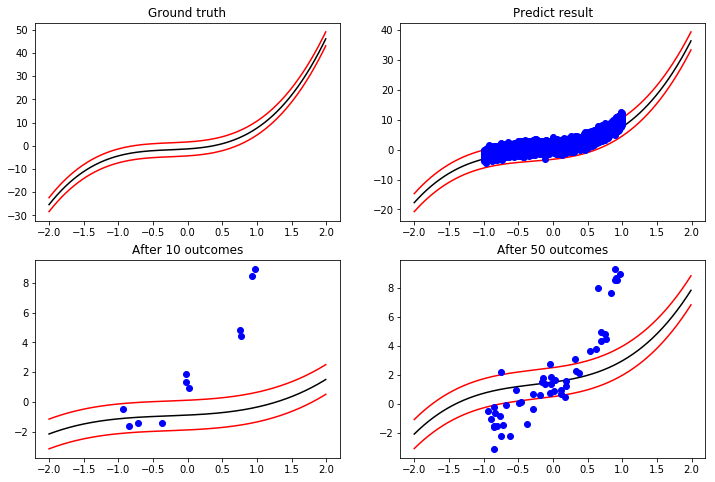

In [20]:
w=np.array([1, 2,3,4])
predictive_distribution(100, 4, 1, w ,plot=False)